# Classification

Fortunately, dataset is cleared. Another advantage is that the categorical labels are transformed into values for example: 1, 2, 3 instead of strings.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
heart_disease_data = pd.read_csv('heart.csv')
heart_disease_data.columns =['age', 'sex', 'chest_pain', 'restbps', 'chol', 'fbs', 'restecg', 'max_heart_rate',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'actual_disease']
disease_counts = heart_disease_data['actual_disease'].value_counts()
print(disease_counts)

1    161
0    136
Name: actual_disease, dtype: int64


As spoken in previous notebook there is slight imbalance: 45% people have heart disease.

As listed on the top of this notebook categorical string variables are already transformed into integers which is an advantage. Now they have to be transformed into "dummy" variables and append them into dataset.

In [3]:
labels = np.array(heart_disease_data['actual_disease'])

In [4]:
def encode_string(cat_features):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ohe = preprocessing.OneHotEncoder(categories='auto')
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['chest_pain', 'fbs', 'exang', 'restecg', 'slope', 'ca', 'thal']

Features = encode_string(heart_disease_data['sex'])
for col in categorical_columns:
    temp = encode_string(heart_disease_data[col])
    Features = np.concatenate([Features, temp], axis = 1)  
    
print(Features.shape)
print(Features[:2, :]) 

(297, 24)
[[0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]]


Next the numeric features must be concatenated to the numpy array

In [5]:
Features = np.concatenate([Features, np.array(heart_disease_data[['age', 'restbps', 'chol', 'max_heart_rate', 'oldpeak']])], axis = 1)
print(Features.shape)
print(Features[:2, :])  

(297, 29)
[[  0.    1.    0.    0.    0.    1.    0.    1.    1.    0.    1.    0.
    0.    1.    0.    0.    1.    0.    0.    0.    0.    1.    0.    0.
   63.  145.  233.  150.    2.3]
 [  0.    1.    0.    0.    1.    0.    1.    0.    1.    0.    0.    1.
    0.    1.    0.    0.    1.    0.    0.    0.    0.    0.    1.    0.
   37.  130.  250.  187.    3.5]]


# Splitting dataset

Splitting the dataset is a must in machine learning. There is no point training the model using all the given data. Dataset have to be splitted to train and test part as below.

In [6]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 80)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

Using StandarScaler from Scikit Learn scaling the model must be applied. All the numeric values must be in a similiar range of vales.

In [7]:
scaler = preprocessing.StandardScaler().fit(X_train[:,28:])
X_train[:,28:] = scaler.transform(X_train[:,28:])
X_test[:,28:] = scaler.transform(X_test[:,28:])
X_train[:2,]

array([[  0.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   0.        ,   1.        ,
          1.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   1.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   0.        ,   0.        ,
         63.        , 145.        , 233.        , 150.        ,
          1.02370131],
       [  0.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   1.        ,   0.        ,
          0.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   1.        ,   0.        ,
          1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   1.        ,
         38.        , 120.        , 231.        , 182.        ,
          2.29260755]])

# Logistic regression

In [8]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Configuration of the model has been printed. For now the model is using basic settings.

In [9]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.0710317]
[[ 0.58477244 -0.65580414 -1.1076005  -0.28827808  0.59750065  0.72734624
  -0.46193223  0.39090053  0.23867415 -0.30970585 -0.15207698  0.21779687
  -0.13675158  0.08446025 -0.68769979  0.53220784  1.71018293 -0.51796468
  -0.77395339 -0.48929655  0.          0.41934242  0.37580664 -0.86618076
   0.0293072  -0.02535506 -0.00180055  0.01783354 -0.49702625]]


This output is a bad sign. All the coefficients are in the same range of values which is not very good. This is a signal that probably model is overfit.

In [10]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.98925987 0.01074013]
 [0.99300457 0.00699543]
 [0.02982574 0.97017426]
 [0.99583863 0.00416137]
 [0.94379345 0.05620655]
 [0.50087137 0.49912863]
 [0.2774823  0.7225177 ]
 [0.06708866 0.93291134]
 [0.83183571 0.16816429]
 [0.3390332  0.6609668 ]
 [0.99268142 0.00731858]
 [0.06512828 0.93487172]
 [0.00777227 0.99222773]
 [0.83169496 0.16830504]
 [0.99547358 0.00452642]]


# Evaluate model 

In [11]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 0 1 0 0 0 1 1 0 1 0 1 1 0 0]
[0 0 0 0 0 0 1 1 0 1 0 1 1 0 0]


In the cell above it is shown a few examples how test data evaluated the model. Actually this is beggining of the work on the machine learning model. There are many ways to evaluate the model:
- Accuracy
- Precision
- Recall
- F1
- ROC
For more information go to: https://scikit-learn.org/stable/modules/model_evaluation.html
Using only accuracy, which is the most popular metric can be misleading and sometimes completly senseless.

In [12]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive        37                 4
Actual negative         3                36

Accuracy  0.91
 
           Positive      Negative
Num case       41            39
Precision    0.93          0.90
Recall       0.90          0.92
F1           0.91          0.91


Metrics looks resonable on the first sight. There is room for improvement. Cases "actual posistive" and "actual negative" have pretty the same values with a little deviation towards negatives (false poitive = 3, false negative = 4). Note: Positive means heart disease.

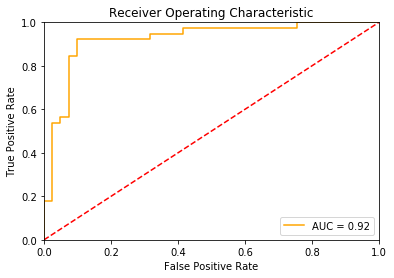

In [13]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)   

The AUC curve seems to be very good. The ideal version is when the curve is the same as the upper and left side of the graph area. Lets try to weight this model. As written before the model is a little imbalanced.

In [14]:
logistic_mod = linear_model.LogisticRegression(solver = 'lbfgs', max_iter = 7600, class_weight = {0:0.55, 1:0.45}) 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.55, 1: 0.45}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=7600,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [15]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.98430265 0.01569735]
 [0.99041456 0.00958544]
 [0.04747547 0.95252453]
 [0.99426798 0.00573202]
 [0.94059563 0.05940437]
 [0.5850108  0.4149892 ]
 [0.34104233 0.65895767]
 [0.0885389  0.9114611 ]
 [0.81566358 0.18433642]
 [0.37490409 0.62509591]
 [0.9888594  0.0111406 ]
 [0.08890463 0.91109537]
 [0.01533177 0.98466823]
 [0.80207842 0.19792158]
 [0.9939337  0.0060663 ]]


                 Confusion matrix
                 Score positive    Score negative
Actual positive        37                 4
Actual negative         3                36

Accuracy  0.91
 
           Positive      Negative
Num case       41            39
Precision    0.93          0.90
Recall       0.90          0.92
F1           0.91          0.91


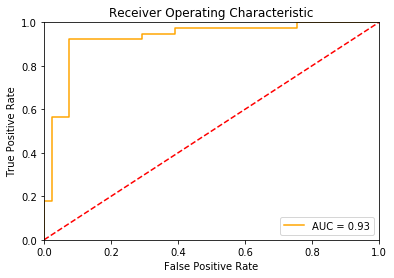

In [16]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)  

This operation did not improve model much.

In this point an important question should be asked. What the model should be focused on? Let's assume that the model is only a tool for a doctor. So in this case, model is ought to define all positive cases (zeroes) as positives and as little negatives (ones) as positives as it can. Classifing sick person as healthy is dangerous, classifing healthy as sick is only a job for a doctor to check this case.

So in this scenario the performance of the model is not actually as good as thought before. 4 out of 41 cases with disease are listed as healthy ones. This is almost 10% chance to be missclassified having a heart disease. Let's try to minimalize this number to zero.

                 Confusion matrix
                 Score positive    Score negative
Actual positive        39                 2
Actual negative        17                22

Accuracy  0.76
 
           Positive      Negative
Num case       41            39
Precision    0.70          0.92
Recall       0.95          0.56
F1           0.80          0.70


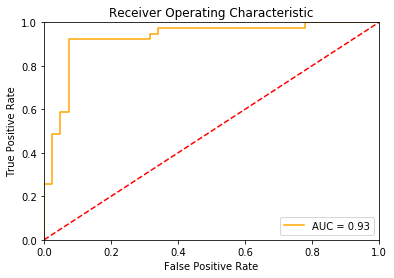

In [17]:
logistic_mod = linear_model.LogisticRegression(solver = 'lbfgs', max_iter = 7600, class_weight = {0:0.85, 1:0.15}) 
logistic_mod.fit(X_train, y_train)

probabilities = logistic_mod.predict_proba(X_test)
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)  

Weighting the model in such way that cases with disease are much more important that those without creates a bias. This not very good for accuracy of the model but this is actually what should the model perform. To find every person with heart disease and point as less false positives as it can.

In [18]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.95, 0.90, 0.85, 0.80, 0.75, 0.7, 0.65, 0.6, 0.55]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For threshold = 0.95
                 Confusion matrix
                 Score positive    Score negative
Actual positive        41                 0
Actual negative        39                 0

Accuracy  0.51
 
           Positive      Negative
Num case       41            39
Precision    0.51          0.00
Recall       1.00          0.00
F1           0.68          0.00

For threshold = 0.9
                 Confusion matrix
                 Score positive    Score negative
Actual positive        41                 0
Actual negative        36                 3

Accuracy  0.55
 
           Positive      Negative
Num case       41            39
Precision    0.53          1.00
Recall       1.00          0.08
F1           0.69          0.14

For threshold = 0.85
                 Confusion matrix
                 Score positive    Score negative
Actual positive        41                 0
Actual negative        34                 5

Accuracy  0.57
 
           Positive      Negative
Num cas

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


For this for loop it is shown that resonable value of threshold is 0.6. It is pretty high although there is only one case with disease missclassified. For threshold = 0.8 there is 0 missclassified cases with disease but accuracy is only 0.61! Very close to just say that all cases have disease. Again it should be considered: what is more important? Better accuracy overall or 100% accuracy in defining disease cases. In the next notebook the model should be improved.

In [19]:
heart_disease_data.to_csv('heart-pre.csv', index=False)

In [20]:
pd.DataFrame(Features).to_csv("Features.csv", index=None)
pd.DataFrame(labels).to_csv("Labels.csv", index=None)